In [1]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.99, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col,i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [2]:
dir_name= "Downloads/dataset/faces"
y=[];x=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path = dir_name+'/'+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = dir_path+image_name
        # Read the input image
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #resize image to 300*300 dimension
        resized_image= cv2.resize(gray,(h,w))
        # convert matrix to vector
        v = resized_image.flatten()
        x.append(v)
        # increase the number of samples n_samples =n_samples+1# Addinng th categorical label 
        y.append(person_id)
        # adding the person name
        target_names.append(person_name)
    # Increase the person id by 1 
    person_id=person_id+1
# transform list to numpy array
y=np.array(y)
x=np.array(x)
target_names =np.array(target_names)
n_features = x.shape[1]
print(y.shape,x.shape,target_names.shape)
print("Number of sampels:",n_samples)
# Download the data, if not already on disk and load it as numpy arrays

# lfw_ people = fetch_lfw_ people(min faces_per_person=70, resize=0.4)

# # introspect the images arrays to find the shapes (for plotting)
# n_samples, h, w = lfw people. images.shape
# print(n samples,h, w)
# # for machine learning we use the 2 data directly (as relative pixel
# # positions info is ignored by this model)
#× = lfw people.data
# n_features - x.shape[1]

# print(x.shape)
# # the label to predict is the id of the person
# print(y)s ifeiny:print("yes")
# target_names = lfw people.target_names
# print(target_names)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" %n_samples)
print("n_features: %d" %n_features)
print("n_classes: %d" %n_classes)

(450,) (450, 90000) (450,)
Number of sampels: 0
Total dataset size:
n_samples: 0
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


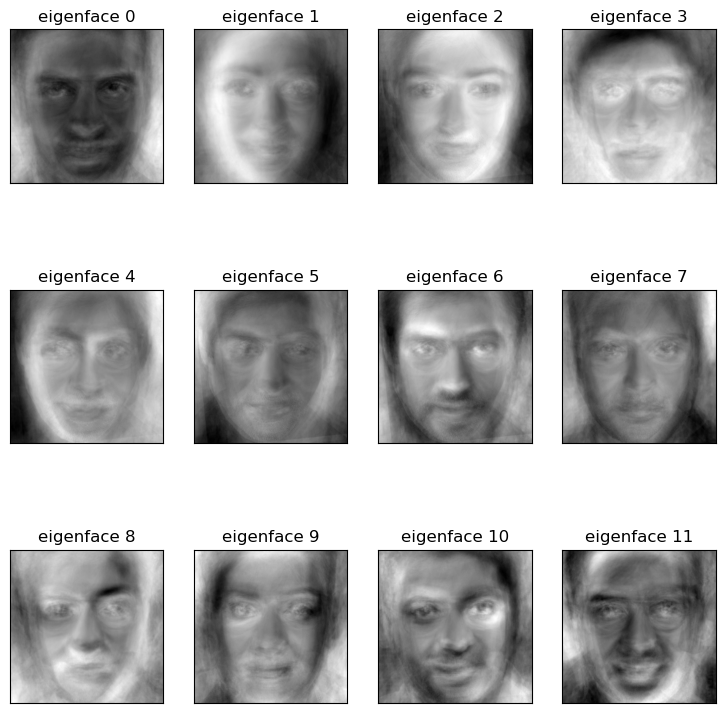

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [3]:
# split into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, x_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)

# Ensure h and w are defined
# h, w = some_height, some_width
eigenfaces = pca.components_.reshape((n_components, h, w))

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)  # Make sure plot_gallery is defined

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape, x_test_pca.shape)

# Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
# Compute LDA of reduced data 
lda.fit(x_train_pca, y_train)
x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)
print("Project done...")

In [4]:
#tratning with Multi tayer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(x_train_lda, y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.25739106
Iteration 2, loss = 2.22186149
Iteration 3, loss = 2.18715421
Iteration 4, loss = 2.15435542
Iteration 5, loss = 2.12181778
Iteration 6, loss = 2.09019255
Iteration 7, loss = 2.06001125
Iteration 8, loss = 2.03015940
Iteration 9, loss = 2.00124064
Iteration 10, loss = 1.97344187
Iteration 11, loss = 1.94568809
Iteration 12, loss = 1.91855283
Iteration 13, loss = 1.89303195
Iteration 14, loss = 1.86755410
Iteration 15, loss = 1.84239395
Iteration 16, loss = 1.81802665
Iteration 17, loss = 1.79389158
Iteration 18, loss = 1.77051898
Iteration 19, loss = 1.74736706
Iteration 20, loss = 1.72420990
Iteration 21, loss = 1.70198923
Iteration 22, loss = 1.68005578
Iteration 23, loss = 1.65769233
Iteration 24, loss = 1.63588943
Iteration 25, loss = 1.61484332
Iteration 26, loss = 1.59315384
Iteration 27, loss = 1.57222090
Iteration 28, loss = 1.55077596
Iteration 29, loss = 1.53011484
Iteration 30, loss = 1.50959832
Iteration 31, loss = 1.48891456
Iteration 32, los

Accuracy: 68.14159292035399


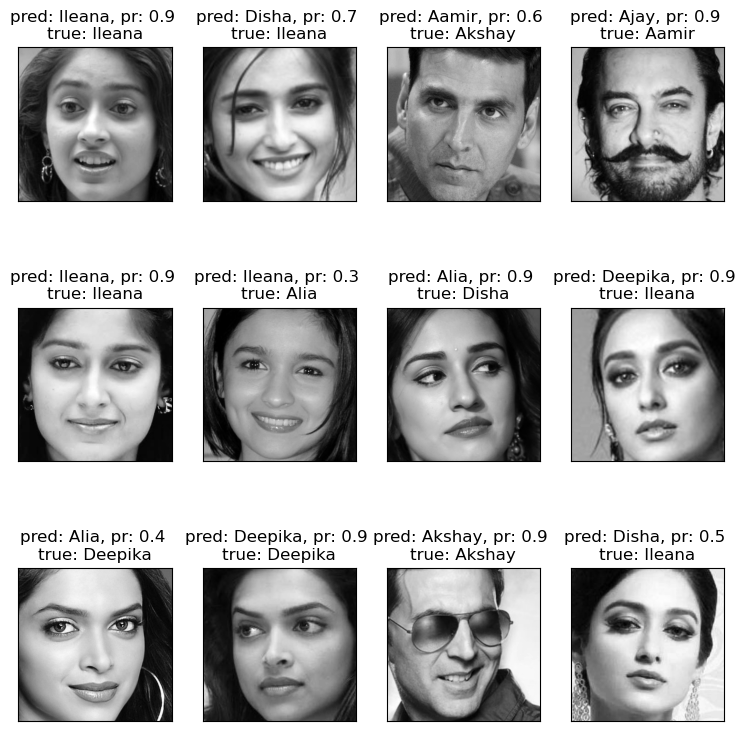

In [8]:
y_pred = []
y_prob = []
for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]  # Assuming binary classification; adjust if needed
    class_id = np.argmax(prob)  # Get the index of the max probability
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[:3], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1
        
print("Accuracy:", true_positive * 100 / y_pred.shape[0])

# Plot results
plot_gallery(x_test, prediction_titles, h, w)  # Ensure plot_gallery is defined
plt.show()